### Type Markdown and LaTeX:  𝛼2

# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cmpD=study_data_complete
grpCmpD=cmpD.groupby("Drug Regimen")

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_stat=pd.DataFrame({
    "Mean Tumor Volume":grpCmpD["Tumor Volume (mm3)"].mean(),
    "Meadian Tumor Volume":grpCmpD["Tumor Volume (mm3)"].median(),
    "Tumor Volume Variance":grpCmpD["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.":grpCmpD["Tumor Volume (mm3)"].std(),
    "Tumor Volume Std. Err":grpCmpD["Tumor Volume (mm3)"].sem()
})
Summary_stat

,Mean Tumor Volume,Meadian Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_stat2=grpCmpD["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

# This method produces everything in a single groupby function
Summary_stat2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

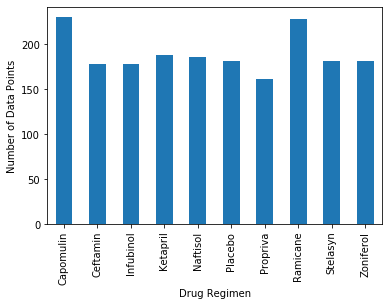

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grpCmpD.Sex.count().plot(kind="bar").set_ylabel("Number of Data Points")
plt.savefig("Drug_Reg_Chart.png")
plt.show()

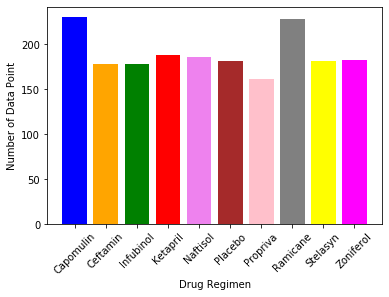

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
y=grpCmpD.Sex.count().array
x=grpCmpD.Sex.count().index.array
plt.bar(x,y,color=["blue","orange","green","red","violet","brown","pink","grey","yellow","magenta"])
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Point")
plt.savefig("Drug_Reg_Chart2.png")
plt.show()

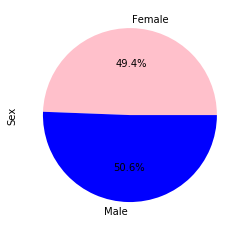

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
grpGend=cmpD.groupby("Sex")

grpGend.Sex.count().plot(kind="pie",colors=["pink", "blue"],\
                         textprops={"color":"black"},autopct="%1.1f%%")
plt.show()

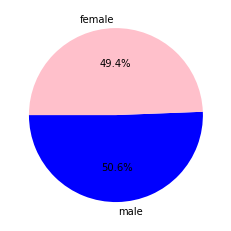

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grpGendCnt= [958,935]

labels = ["male", "female"]
colors = ["blue", "pink"]

plt.pie(grpGendCnt, autopct="%1.1f%%", colors=colors, startangle=180, labels=labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Generate separate dataframes for each drug in order to plot results
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = study_data_complete.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = study_data_complete[['Mouse ID','Timepoint']].merge(study_data_complete,on=['Mouse ID','Timepoint'],how="left")
capomulin_df = merge_data.loc[merge_data["Drug Regimen"]=="Capomulin"]['Tumor Volume (mm3)']
ceftamin_df = merge_data.loc[merge_data["Drug Regimen"]=="Ceftamin"]['Tumor Volume (mm3)']
ramicane_df = merge_data.loc[merge_data["Drug Regimen"]=="Ramicane"]['Tumor Volume (mm3)']
infubinol_df = merge_data.loc[merge_data["Drug Regimen"]=="Infubinol"]['Tumor Volume (mm3)']
# Quantitatively determine capomulin outliers
cap_finals = capomulin_df
cap_quarts = cap_finals.quantile([.25,.5,.75])
cap_lowerq = cap_quarts[0.25]
cap_upperq = cap_quarts[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_b = cap_lowerq - (1.5*cap_iqr)
cap_upper_b = cap_upperq + (1.5*cap_iqr)

print(f"Capomluin potential outliers: {cap_lower_b} and {cap_upper_b}")

Capomluin potential outliers: 26.714832162499995 and 55.9711007025


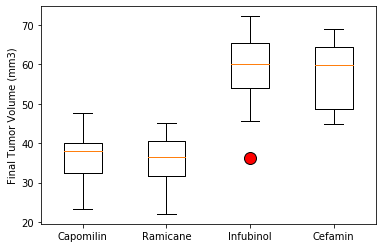

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

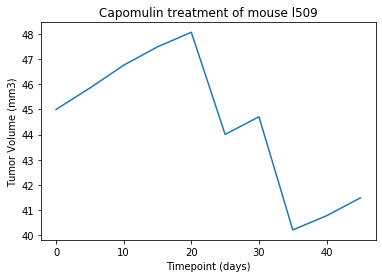

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


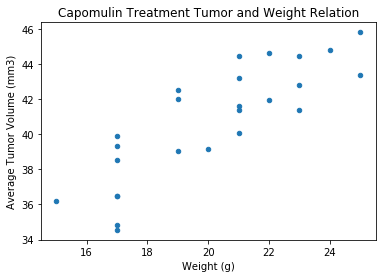

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


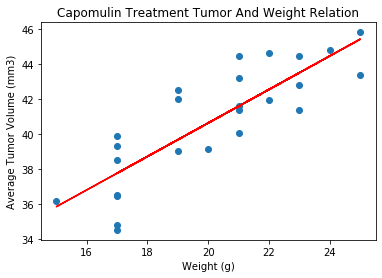

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and average tumor volume is {linier_corr}.")
